# Get and Merge Data

## read data

In [1]:
from nptdms import TdmsFile
import numpy as np
import pandas as pd

#set Tdms file path
tdms20190513_01_01 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100515.tdms')
tdms20190513_01_02 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100615.tdms')
tdms20190513_01_03 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100715.tdms')
tdms20190513_01_04 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100816.tdms')

tdms20190513_01_11 = TdmsFile(r'D:\data\20190513\01\Current&Volage 05-13-19 时间 100515.tdms')
tdms20190513_01_12 = TdmsFile(r'D:\data\20190513\01\Current&Volage 05-13-19 时间 100615.tdms')
tdms20190513_01_13 = TdmsFile(r'D:\data\20190513\01\Current&Volage 05-13-19 时间 100715.tdms')
tdms20190513_01_14 = TdmsFile(r'D:\data\20190513\01\Current&Volage 05-13-19 时间 100816.tdms')

#set Tdms file path
tdms20190513_21_01 = TdmsFile(r'D:\data\20190513\12\Acc 05-13-19 时间 193011.tdms')
tdms20190513_21_11 = TdmsFile(r'D:\data\20190513\12\Current&Volage 05-13-19 时间 193011.tdms')

## class bags to read from TDMS

In [2]:
class TDMS_Vibration():
    def __init__(self, tdmsfile):
        self.tdmsfile = tdmsfile
        group_name = 'Measured Data'
        
        channel_x_0 = tdmsfile.object(group_name, 'x_0')
        channel_y_0 = tdmsfile.object(group_name, 'y_0')
        channel_z_0 = tdmsfile.object(group_name, 'z_0')
        channel_x_1 = tdmsfile.object(group_name, 'x_1')
        channel_y_1 = tdmsfile.object(group_name, 'y_1')
        channel_z_1 = tdmsfile.object(group_name, 'z_1')
        
        self.data_x_0 = channel_x_0.data
        self.data_y_0 = channel_y_0.data
        self.data_z_0 = channel_z_0.data
        self.data_x_1 = channel_x_1.data
        self.data_y_1 = channel_y_1.data
        self.data_z_1 = channel_z_1.data
        
    def x_0(self):
        return self.data_x_0
    
    def y_0(self):
        return self.data_y_0
    
    def z_0(self):
        return self.data_z_0
    
    def x_1(self):
        return self.data_x_1
    
    def y_1(self):
        return self.data_y_1

    def z_1(self):
        return self.data_z_1

In [3]:
class TDMS_Power():
    def __init__(self, tdmsfile):
        self.tdmsfile = tdmsfile
        group_name = 'Measured Data'
        
        channel_power = tdmsfile.object(group_name, 'Power')
        self.data_power = channel_power.data

        
    def power(self):
        return self.data_power

## use bags to get data

In [5]:
vibration_20190153_01_01 = TDMS_Vibration(tdms20190513_01_01)
vibration_20190153_01_02 = TDMS_Vibration(tdms20190513_01_02)
vibration_20190153_01_03 = TDMS_Vibration(tdms20190513_01_03)
vibration_20190153_01_04 = TDMS_Vibration(tdms20190513_01_04)

vibration_20190153_21 = TDMS_Vibration(tdms20190513_21_01)

In [4]:
power_20190153_01_01 = TDMS_Power(tdms20190513_01_11)
power_20190153_01_02 = TDMS_Power(tdms20190513_01_12)
power_20190153_01_03 = TDMS_Power(tdms20190513_01_13)
power_20190153_01_04 = TDMS_Power(tdms20190513_01_14)

power_20190153_21 = TDMS_Power(tdms20190513_21_11)

## merge the data

In [6]:
vibration_20190153_01_x_0 = np.concatenate((vibration_20190153_01_01.x_0(), vibration_20190153_01_02.x_0(), vibration_20190153_01_03.x_0(), vibration_20190153_01_04.x_0()))
vibration_20190153_01_y_0 = np.concatenate((vibration_20190153_01_01.y_0(), vibration_20190153_01_02.y_0(), vibration_20190153_01_03.y_0(), vibration_20190153_01_04.y_0()))
vibration_20190153_01_z_0 = np.concatenate((vibration_20190153_01_01.z_0(), vibration_20190153_01_02.z_0(), vibration_20190153_01_03.z_0(), vibration_20190153_01_04.z_0()))

vibration_20190153_01_x_1 = np.concatenate((vibration_20190153_01_01.x_1(), vibration_20190153_01_02.x_1(), vibration_20190153_01_03.x_1(), vibration_20190153_01_04.x_1()))
vibration_20190153_01_y_1 = np.concatenate((vibration_20190153_01_01.y_1(), vibration_20190153_01_02.y_1(), vibration_20190153_01_03.y_1(), vibration_20190153_01_04.y_1()))
vibration_20190153_01_z_1 = np.concatenate((vibration_20190153_01_01.z_1(), vibration_20190153_01_02.z_1(), vibration_20190153_01_03.z_1(), vibration_20190153_01_04.z_1()))

In [5]:
power_20190153_01_power = np.concatenate((power_20190153_01_01.power(), power_20190153_01_02.power(), power_20190153_01_03.power(), power_20190153_01_04.power()))

In [6]:
import linecache
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(16,8)) # 设定画图板尺寸
plt.plot(vibration_20190153_01_x_1[300000:3500000])
#plt.xlim(0,1000)
#plt.savefig(r'D:\data\20190513\04\x_1.jpg')
plt.show()

# class FFT bags

In [7]:
def DoFFT(data):
    n = len(data)
    yf = 2* abs(np.fft.fft(data)) / n
    xf = fftpack.rfftfreq(n, d=1/1000)*2
    return xf, yf

plt.plot(DoFFT(vibration_20190153_13.x_0()[m:n]), color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('FFT of No.13 Vibration of x_0')
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)

plt.plot(DoFFT(vibration_20190153_13.x_0()[m:n]), color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('FFT of No.13 Vibration of x_0')
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)

# Plot and Show

## import Chinese Words

In [8]:
from scipy import fftpack

def DoFFT(data):
    n = len(data)
    yf = 2* abs(np.fft.fft(data)) / n
    xf = fftpack.rfftfreq(n, d=1/1000)*2
    return xf, yf

def DoFFT(data):
    n = len(data)
    yf = abs(np.fft.fft(data)) / n
    xf = np.fft.fftfreq(n, d=1/1000)
    return xf, yf

m =  300000
n =  350000
p = 2500000
q = 2550000
num=n-m
amplitude = 2* abs(np.fft.fft(vibration_20190153_01_x_0[m:n])) / num
freq = fftpack.rfftfreq(num, d=1/2000)*2
plt.plot(freq, amplitude)
plt.plot()
plt.xlim(0,)

NameError: name 'vibration_20190153_01_x_0' is not defined

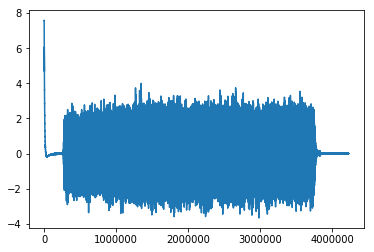

In [50]:
plt.plot(vibration_20190153_01_x_0)

# 正确的FFT代码

(0, 0.0004)

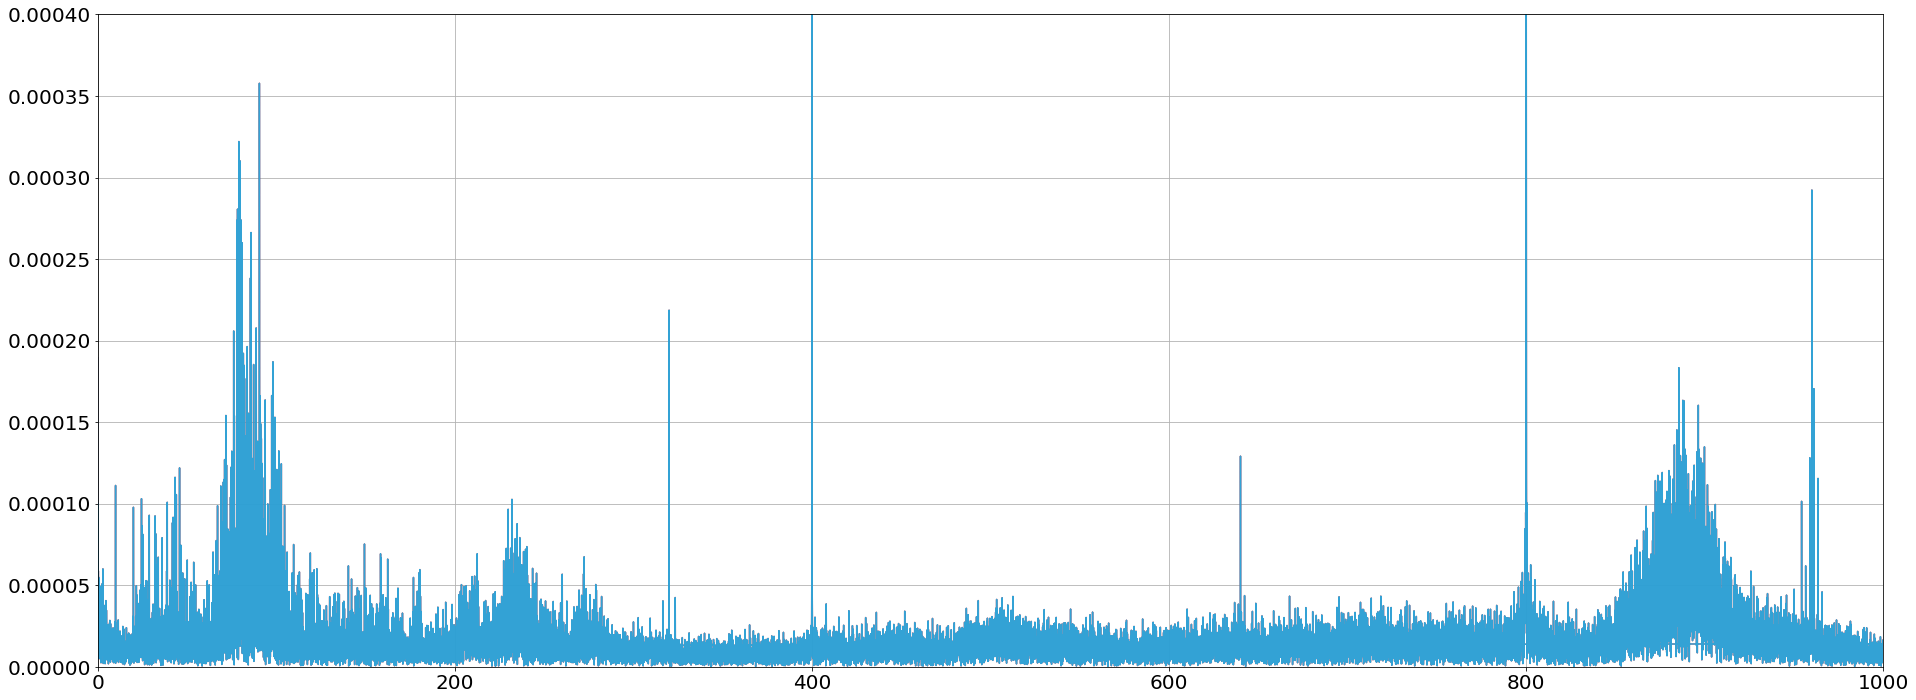

In [84]:
plt.figure(figsize=(32,12))
#mplitude = abs(np.fft.fft(vibration_20190153_01_z_1[p:q])) / num
freq = fftpack.fftfreq(num, d=1/2000)
plt.plot(freq, amplitude, alpha = 0.8, color = 'r')

amplitude = abs(np.fft.fft(vibration_20190153_01_z_1[m:n])) / num
freq = fftpack.fftfreq(num, d=1/2000)
plt.plot(freq, amplitude,alpha = 0.8,color = 'deepskyblue')

plt.grid()
plt.tick_params(axis = 'both', labelsize = 20)
plt.plot()
plt.xlim(0,1000)
plt.ylim(0,0.0004)

In [1]:
def DoFFT(data):
    data_FFT = abs(np.fft.fft(data)) / len(data)
    return data_FFT

m = 2000000
n = 2100000
p = 2500000
q = 2600000

plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'green', alpha = 0.8, label = 'new_tool')
plt.plot(DoFFT(vibration_20190153_21.x_0()[p:q]), color = 'red', alpha = 0.8, label = 'broken_tool')
plt.title('FFT to Vibration of x_0', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.xlim(0,(n-m)/2)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =16)
plt.ylabel('FFT', fontsize =12)
plt.tick_params(axis = 'both', labelsize = 12)

NameError: name 'plt' is not defined

#### x_0 y_0 z_0

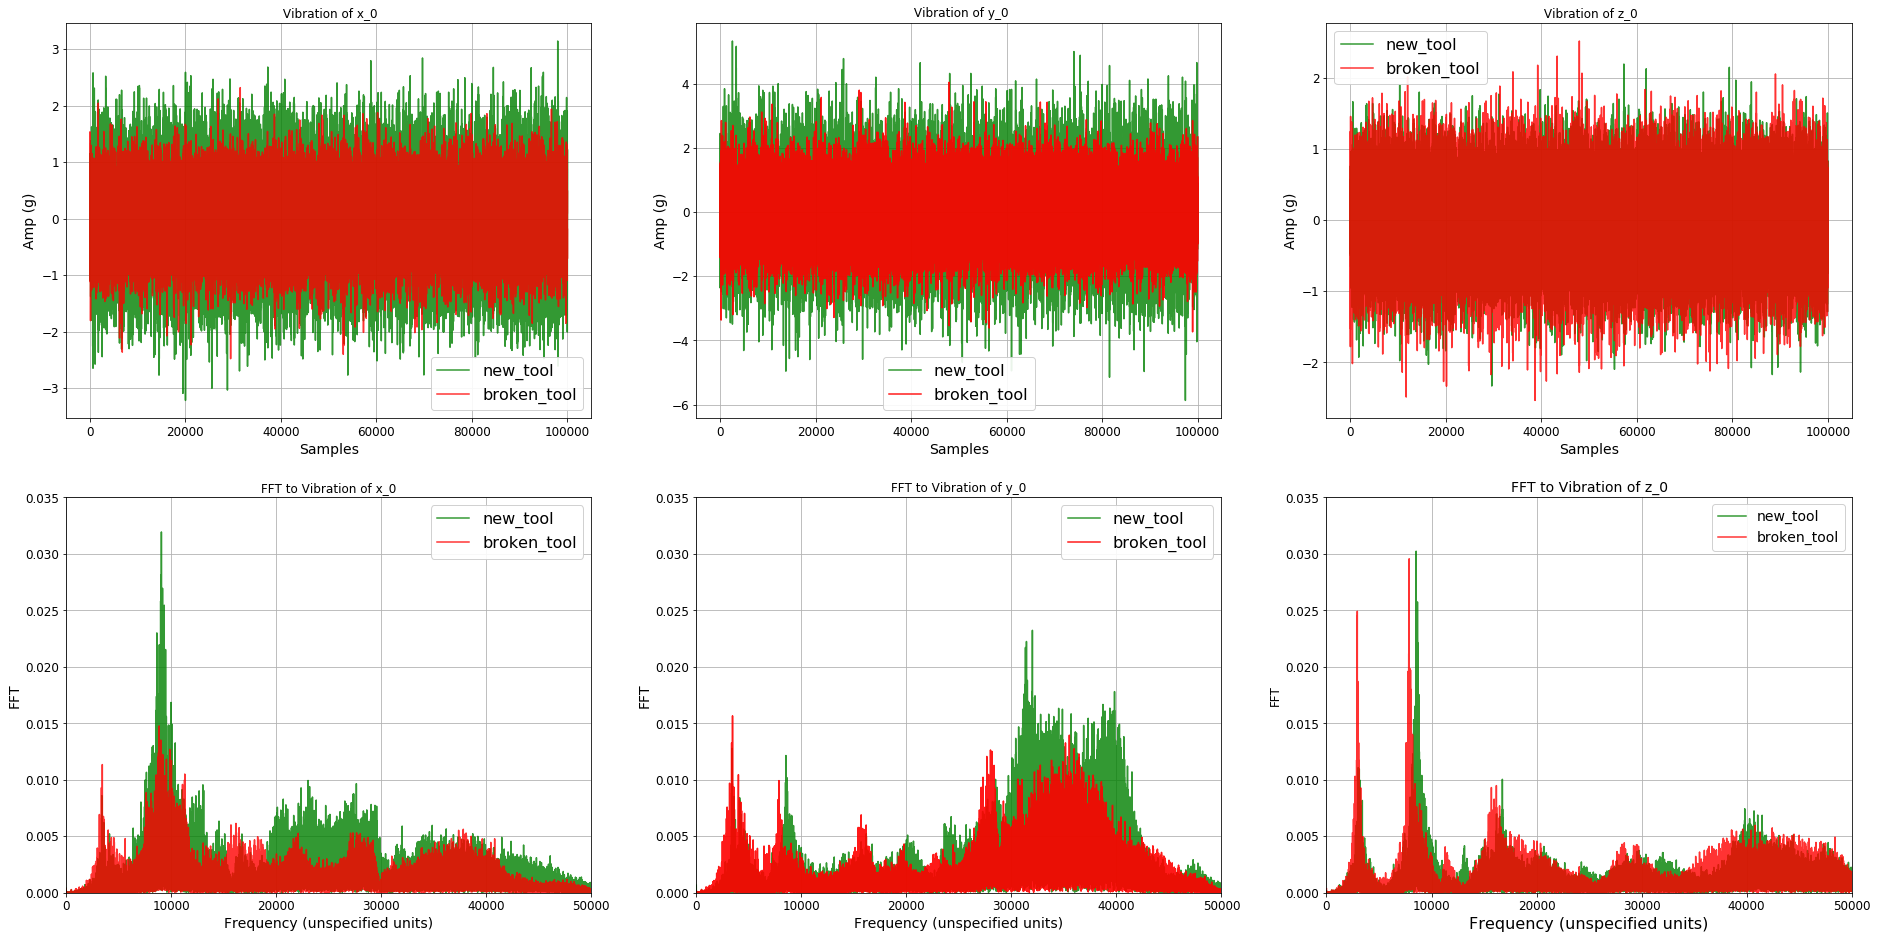

In [12]:
m = 2000000
n = 2100000
p = 2500000
q = 2600000

plt.figure(figsize=(32, 16)) # 设定画图板尺寸

plt.subplot(2, 3, 1)
plt.plot(vibration_20190153_01_x_0[m:n],color = 'green', alpha = 0.8, label = 'new_tool')
plt.plot(vibration_20190153_21.x_0()[p:q],color = 'red', alpha = 0.8, label = 'broken_tool')
plt.title(' Vibration of x_0', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.grid()
plt.xlabel('Samples', fontsize =14)
plt.ylabel('Amp (g)', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 3, 4)
plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'green', alpha = 0.8, label = 'new_tool')
plt.plot(DoFFT(vibration_20190153_21.x_0()[p:q]), color = 'red', alpha = 0.8, label = 'broken_tool')
plt.title('FFT to Vibration of x_0', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.xlim(0,(n-m)/2)
plt.ylim(0, 0.035)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =14)
plt.ylabel('FFT', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 3, 2)
plt.plot(vibration_20190153_01_y_0[m:n],color = 'green', alpha = 0.8, label = 'new_tool')
plt.plot(vibration_20190153_21.y_0()[p:q],color = 'red', alpha = 0.9, label = 'broken_tool')
plt.title(' Vibration of y_0', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.grid()
plt.xlabel('Samples', fontsize =14)
plt.ylabel('Amp (g)', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 3, 5)
plt.plot(DoFFT(vibration_20190153_01_y_0[m:n]), color = 'green', alpha = 0.8, label = 'new_tool')
plt.plot(DoFFT(vibration_20190153_21.y_0()[p:q]), color = 'red', alpha = 0.9, label = 'broken_tool')
plt.title('FFT to Vibration of y_0', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.xlim(0,(n-m)/2)
plt.ylim(0, 0.035)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =14)
plt.ylabel('FFT', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 3, 3)
plt.plot(vibration_20190153_01_z_0[m:n],color = 'green', alpha = 0.8, label = 'new_tool')
plt.plot(vibration_20190153_21.z_0()[p:q],color = 'red', alpha = 0.8, label = 'broken_tool')
plt.title(' Vibration of z_0', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.grid()
plt.xlabel('Samples', fontsize =14)
plt.ylabel('Amp (g)', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 3, 6)
plt.plot(DoFFT(vibration_20190153_01_z_0[m:n]), color = 'green', alpha = 0.8, label = 'new_tool')
plt.plot(DoFFT(vibration_20190153_21.z_0()[p:q]), color = 'red', alpha = 0.8, label = 'broken_tool')
plt.title('FFT to Vibration of z_0', fontsize =14)
plt.legend(loc='best', framealpha = 0.9, fontsize = 14)
plt.xlim(0,(n-m)/2)
plt.ylim(0, 0.035)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =16)
plt.ylabel('FFT', fontsize =12)
plt.tick_params(axis = 'both', labelsize = 12)

#### x_1 y_1 z_1

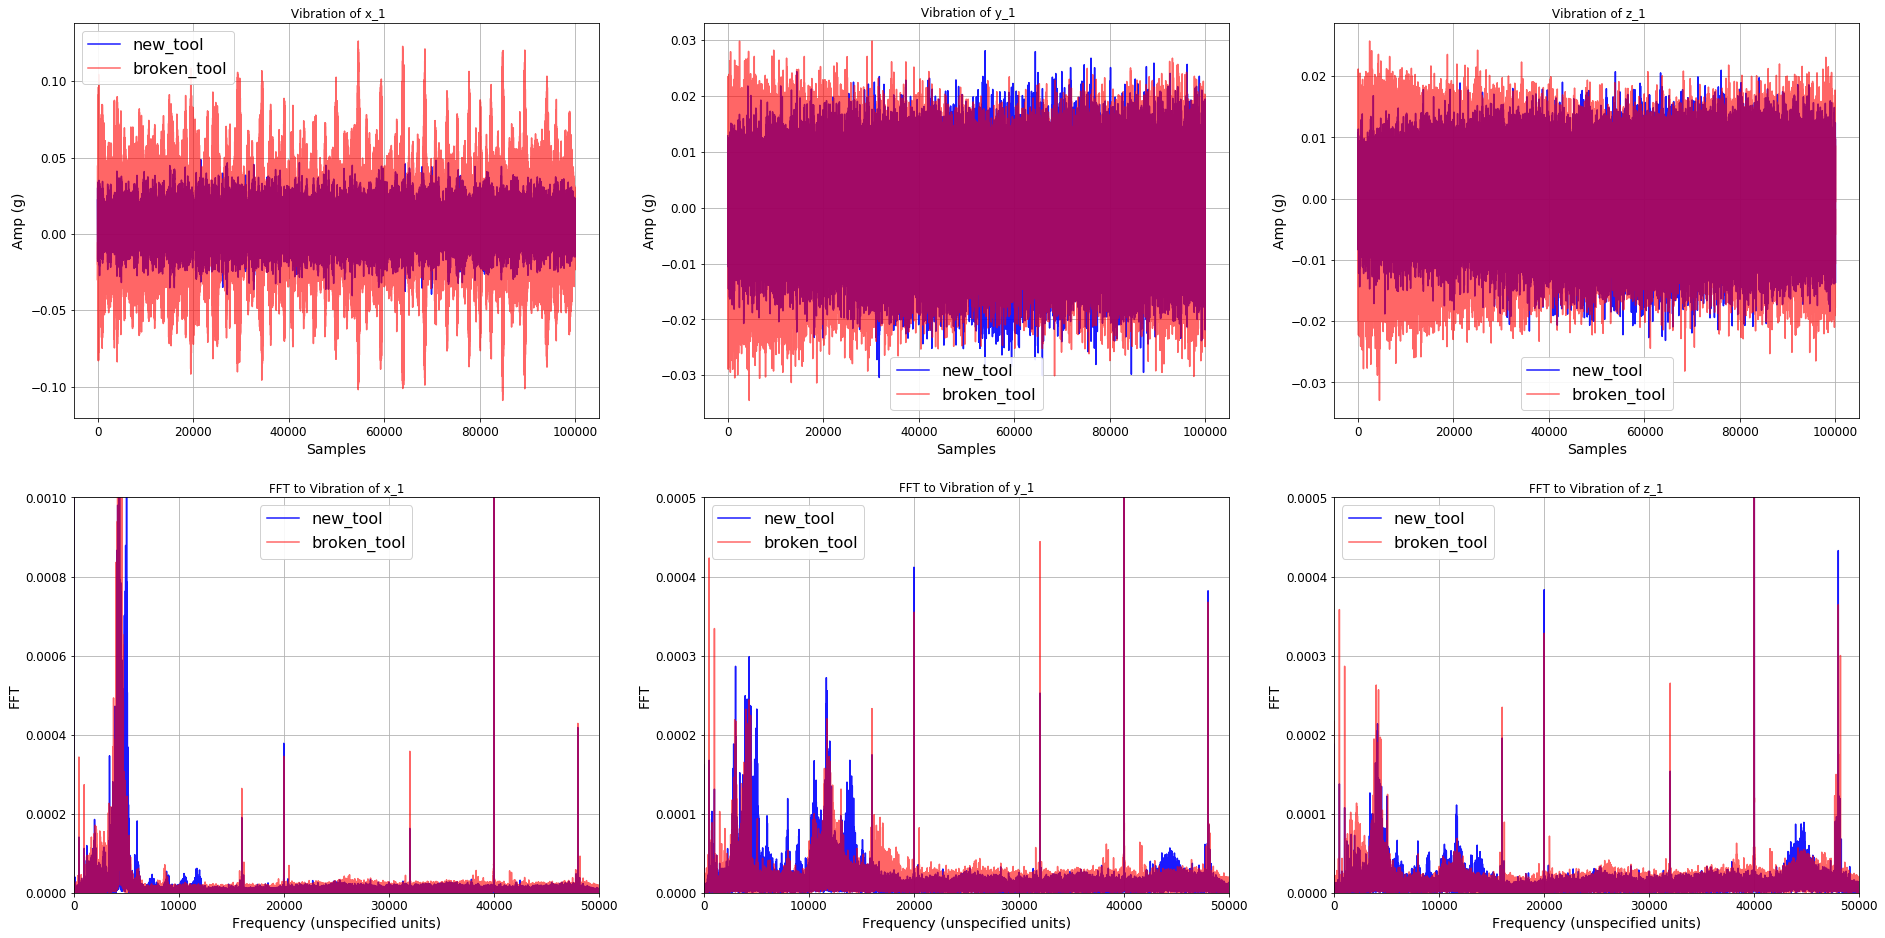

In [20]:
m = 2000000
n = 2100000
p = 2500000
q = 2600000

plt.figure(figsize=(32, 16)) # 设定画图板尺寸
#--------------------------------------------------------------------------------------------------------
plt.subplot(2, 3, 1)
plt.plot(vibration_20190153_01_x_1[m:n],color = 'blue', alpha = 0.9, label = 'new_tool')
plt.plot(vibration_20190153_21.x_1()[p:q],color = 'red', alpha = 0.6, label = 'broken_tool')
plt.title(' Vibration of x_1', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.grid()
plt.xlabel('Samples', fontsize =14)
plt.ylabel('Amp (g)', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 3, 4)
plt.plot(DoFFT(vibration_20190153_01_x_1[m:n]), color = 'blue', alpha = 0.9, label = 'new_tool')
plt.plot(DoFFT(vibration_20190153_21.x_1()[p:q]), color = 'red', alpha = 0.6, label = 'broken_tool')
plt.title('FFT to Vibration of x_1', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.xlim(0,(n-m)/2)
plt.ylim(0, 0.001)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =14)
plt.ylabel('FFT', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)
#--------------------------------------------------------------------------------------------------------
plt.subplot(2, 3, 2)
plt.plot(vibration_20190153_01_y_1[m:n],color = 'blue', alpha = 0.9, label = 'new_tool')
plt.plot(vibration_20190153_21.y_1()[p:q],color = 'red', alpha = 0.6, label = 'broken_tool')
plt.title(' Vibration of y_1', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.grid()
plt.xlabel('Samples', fontsize =14)
plt.ylabel('Amp (g)', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 3, 5)
plt.plot(DoFFT(vibration_20190153_01_y_1[m:n]), color = 'blue', alpha = 0.9, label = 'new_tool')
plt.plot(DoFFT(vibration_20190153_21.y_1()[p:q]), color = 'red', alpha = 0.6, label = 'broken_tool')
plt.title('FFT to Vibration of y_1', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.xlim(0,(n-m)/2)
plt.ylim(0, 0.0005)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =14)
plt.ylabel('FFT', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)
#--------------------------------------------------------------------------------------------------------
plt.subplot(2, 3, 3)
plt.plot(vibration_20190153_01_z_1[m:n],color = 'blue', alpha = 0.9, label = 'new_tool')
plt.plot(vibration_20190153_21.z_1()[p:q],color = 'red', alpha = 0.6, label = 'broken_tool')
plt.title(' Vibration of z_1', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.grid()
plt.xlabel('Samples', fontsize =14)
plt.ylabel('Amp (g)', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 3, 6)
plt.plot(DoFFT(vibration_20190153_01_z_1[m:n]), color = 'blue', alpha = 0.9, label = 'new_tool')
plt.plot(DoFFT(vibration_20190153_21.z_1()[p:q]), color = 'red', alpha = 0.6, label = 'broken_tool')
plt.title('FFT to Vibration of z_1', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.xlim(0,(n-m)/2)
plt.ylim(0, 0.0005)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =14)
plt.ylabel('FFT', fontsize =14)
plt.tick_params(axis = 'both', labelsize = 12)

In [25]:
power_20190153_01_01.power(), power_20190153_21.power()

(array([0.30614558, 0.31288913, 0.2869686 , ..., 0.39591912, 0.39886942,
        0.44207031]),
 array([0.26863457, 0.3027738 , 0.26610574, ..., 0.29792688, 0.2705312 ,
        0.26758089]))

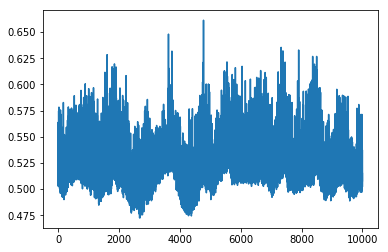

In [37]:
plt.plot(power_20190153_21.power()[650000:660000])

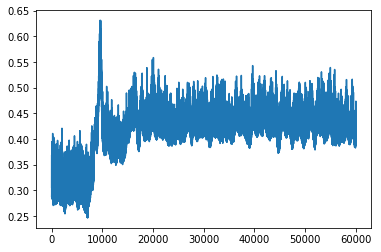

In [40]:
plt.plot(power_20190153_01_01.power()[25000:35000])

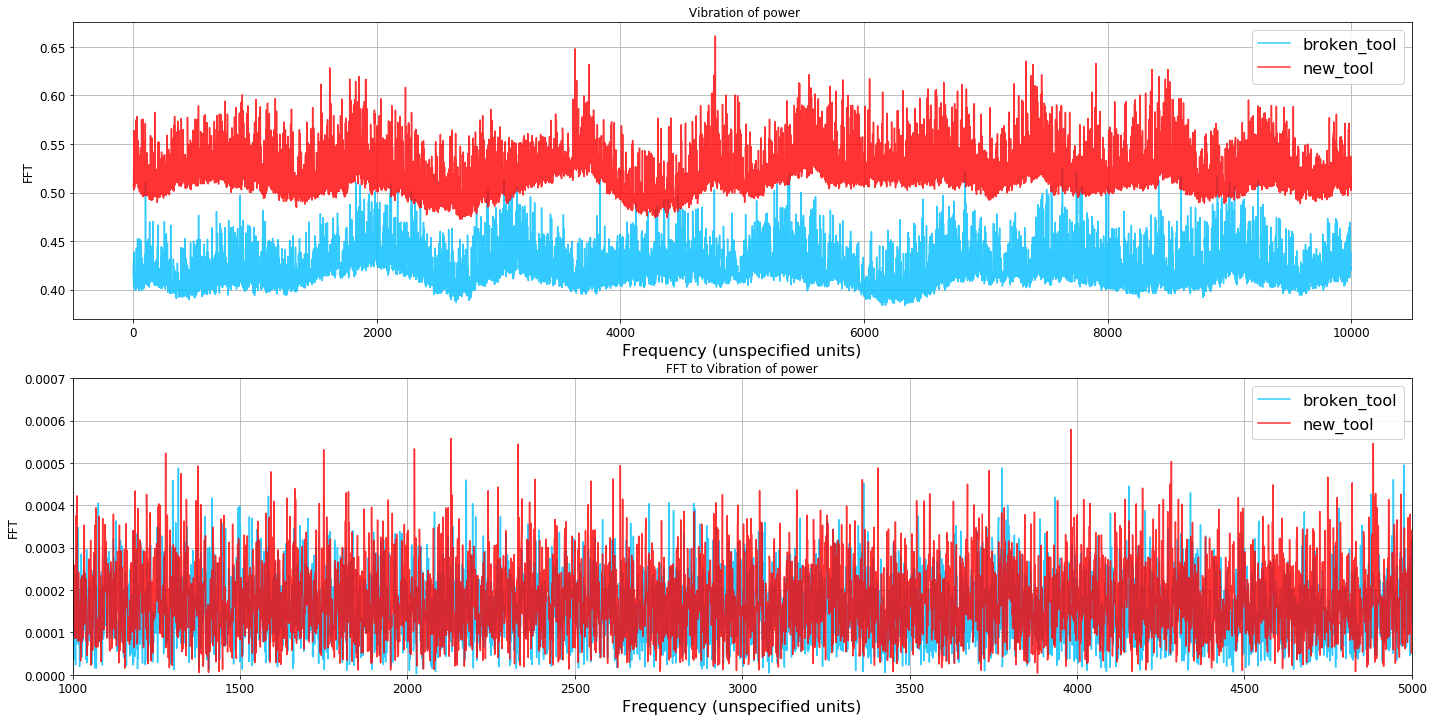

In [14]:
m = 25000
n = 35000
p =650000
q =660000

plt.figure(figsize=(24, 12)) # 设定画图板尺寸

plt.subplot(2, 1, 1)
plt.plot(power_20190153_01_01.power()[m:n],color = 'red', alpha = 0.8, label = 'broken_tool')
plt.plot(power_20190153_21.power()[p:q],color = 'deepgreen', alpha = 0.8, label = 'new_tool')
plt.title(' Power', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =16)
plt.ylabel('FFT', fontsize =12)
plt.tick_params(axis = 'both', labelsize = 12)

plt.subplot(2, 1, 2)
plt.plot(DoFFT(power_20190153_01_01.power()[m:n]), color = 'deepskyblue', alpha = 0.8, label = 'broken_tool')
plt.plot(DoFFT(power_20190153_21.power()[p:q]), color = 'r', alpha = 0.8, label = 'new_tool')
plt.title('FFT to Vibration of power', fontsize =12)
plt.legend(loc='best', framealpha = 0.9, fontsize = 16)
plt.xlim(1000,(n-m)/2)
plt.ylim(0, 0.0007)
plt.grid()
plt.xlabel('Frequency (unspecified units)', fontsize =16)
plt.ylabel('FFT', fontsize =12)
plt.tick_params(axis = 'both', labelsize = 12)

(0, 50)

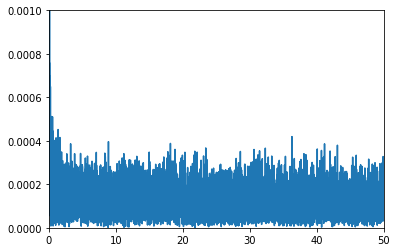

In [17]:
m = 25000
n = 45000

def DoFFT(data):
    lens = len(data)
    yf = abs(np.fft.fft(data)) / lens
    xf = np.fft.fftfreq(lens, d=1/100)
    return xf, yf

xf_new = DoFFT(power_20190153_21.power()[m:n])[0]
yf_new = DoFFT(power_20190153_21.power()[m:n])[1]


y = power_20190153_21.power()[m:n]
yf = abs(np.fft.fft(y))
plt.plot(xf_new, yf_new)
plt.ylim(0,0.001)
plt.xlim(0,50)
#yf_new
#len(power_20190153_21.power()[m:n])

(0, 50)

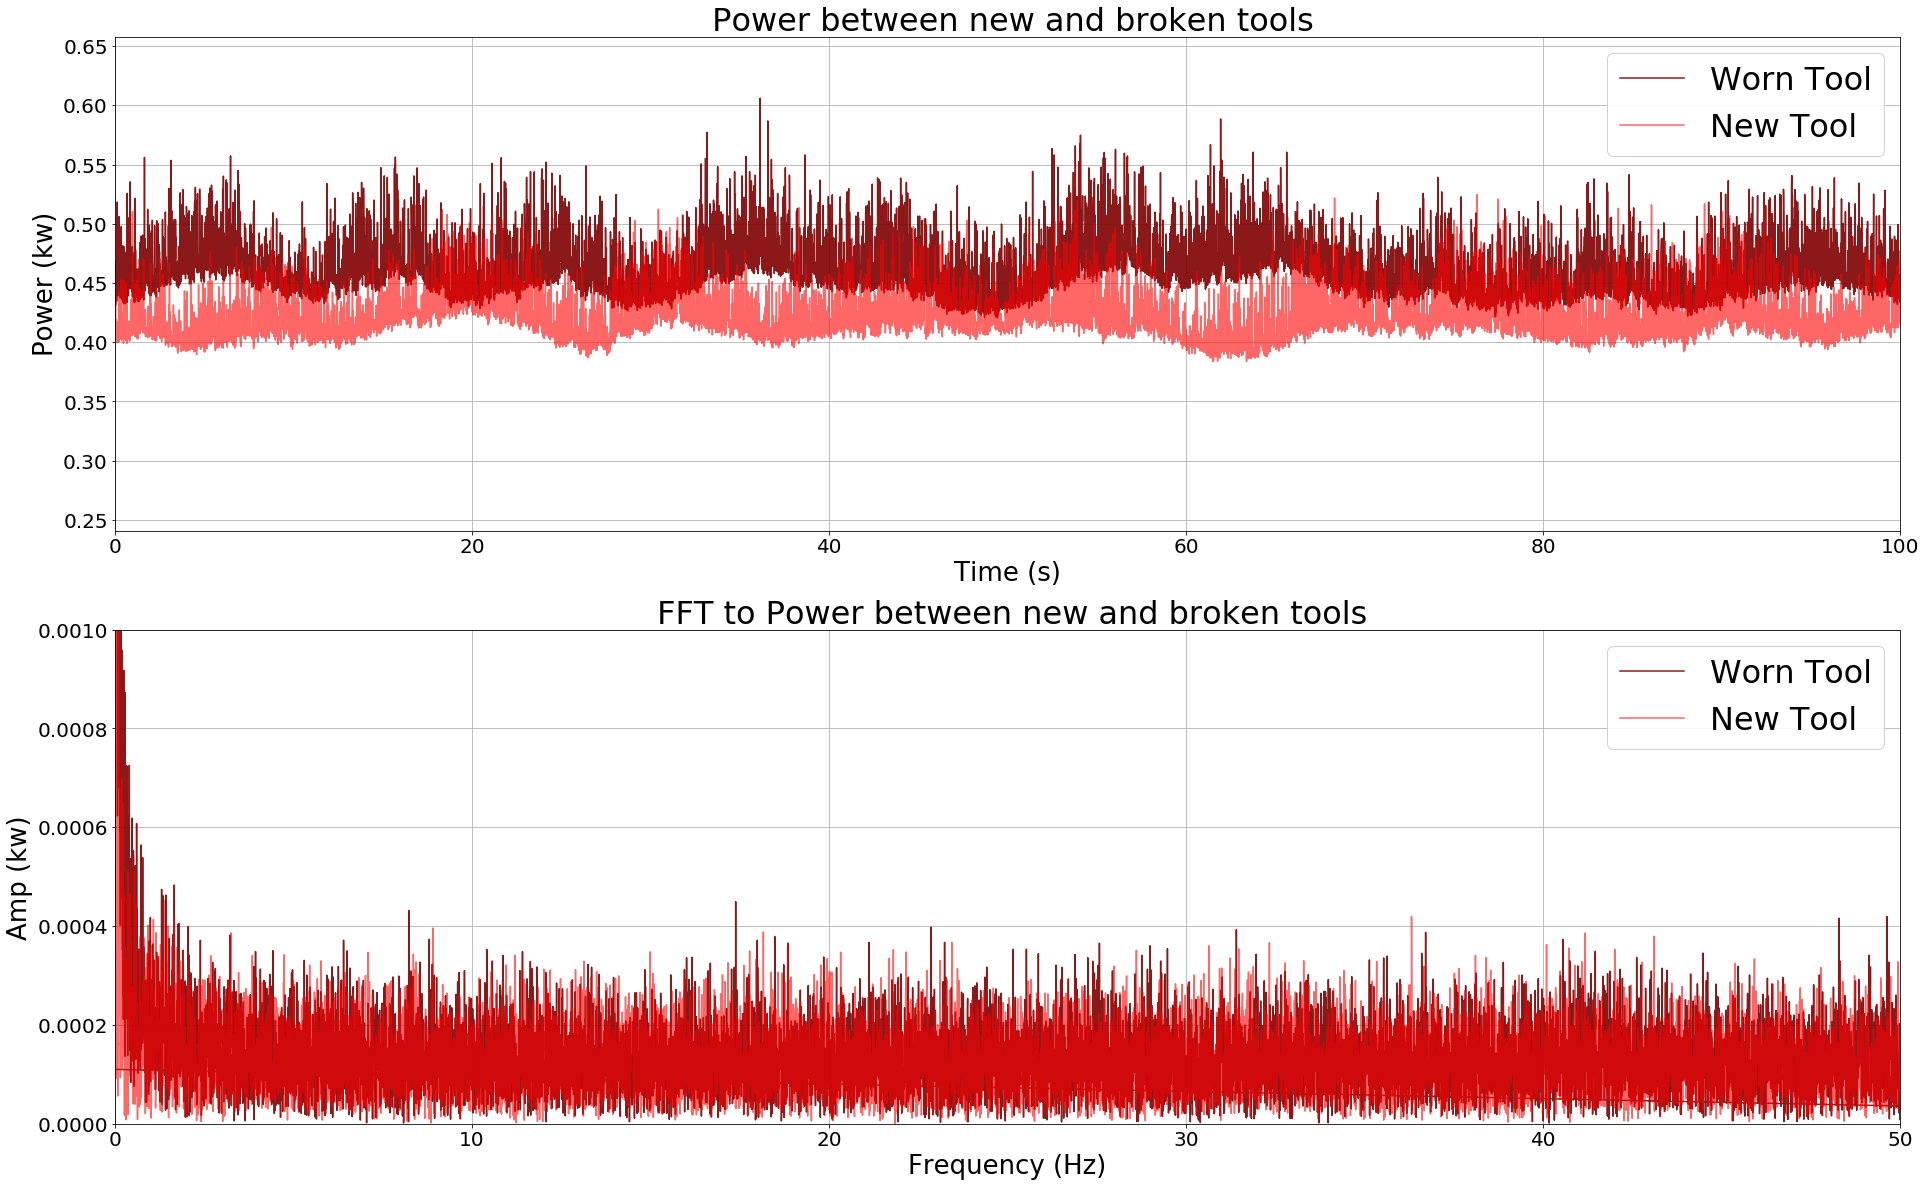

In [26]:
m = 25000
n = 45000
p =150000
q =170000
num = n-m


plt.figure(figsize=(32, 20)) # 设定画图板尺寸
x = np.arange(n-m)
t = x/100

plt.subplot(2,1,1)
plt.plot(t, power_20190153_21.power()[p:q],color = 'maroon', alpha = 0.9, label = 'Worn Tool')
plt.plot(t, power_20190153_01_01.power()[m:n],color = 'red', alpha = 0.6, label = 'New Tool')

plt.title(' Power between new and broken tools', fontsize =32)
plt.legend(loc='best', framealpha = 0.9, fontsize = 32)
plt.grid()
plt.xlabel('Time (s)', fontsize =26)
plt.ylabel('Power (kw)', fontsize =26)
plt.tick_params(axis = 'both', labelsize = 20)
plt.xlim(0,100)




def DoFFT(data):
    lens = len(data)
    yf = abs(np.fft.fft(data)) / lens
    xf = np.fft.fftfreq(lens, d=1/100)
    return xf, yf

xf_new = DoFFT(power_20190153_21.power()[m:n])[0]
yf_new = DoFFT(power_20190153_21.power()[m:n])[1]
xf_old = DoFFT(power_20190153_21.power()[p:q])[0]
yf_old = DoFFT(power_20190153_21.power()[p:q])[1]


plt.subplot(2,1,2)
plt.plot(xf_old, yf_old,color = 'maroon', alpha = 0.9, label = 'Worn Tool')
plt.plot(xf_new, yf_new,color = 'red', alpha = 0.6, label = 'New Tool')
plt.title(' FFT to Power between new and broken tools', fontsize =32)
plt.legend(loc='best', framealpha = 0.9, fontsize = 32)
plt.grid()
plt.xlabel('Frequency (Hz)', fontsize =26)
plt.ylabel('Amp (kw)', fontsize =26)
plt.tick_params(axis = 'both', labelsize = 20)
plt.ylim(0,0.001)
plt.xlim(0,50)